## Final Project Submission

Please fill out:
* Student name: Radka Kucarova
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


<font size='4' > My approach to this project is to find the most successful and profitable movie genre produced in the past 10 years. I will be analyzing movies and genres from two datasets to check if the most produced genres have the highest ratings, popularity, and profits, and how budget, length of a movie, average ratings, and popularity affects the profit.</font> 

<font size='4' > Importing necessary libraries. </font> 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<font size='4' >Loading the first file as df1.</font> 

In [21]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<font size='4' >Loading the second file as df2.</font> 

In [22]:
df2 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<font size='4' >Merging and analyzing the two files to get all the data into one dataframe as df12.</font> 

In [23]:
df12 = pd.merge(df1, df2, on = 'tconst')
df12.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


<font size='4' >Converting the genres' column into a list and that list into multiple rows in order to separate the genres' categories.</font> 

In [24]:
# Converting the genres from string into a list using split on the comma.
df12['genres'] = df12['genres'].str.split(',')
df12.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43


In [25]:
# Separating the different ganres' categories into df12_new.
df12_new = df12.explode('genres')
df12_new.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


<font size='4' >Checking for missing values.</font> 

In [26]:
df12_new.isna().sum() / len(df12_new) 

tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.079981
genres             0.006218
averagerating      0.000000
numvotes           0.000000
dtype: float64

<font size='4' >Replacing all the missing values for runtime_minutes' column with the median.</font> 

In [27]:
df12_new['runtime_minutes'] = df12_new['runtime_minutes'].fillna(df12_new['runtime_minutes'].median())

In [28]:
# Checking if runtime_minutes' missing values were replaced.
df12_new.isna().sum() 

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64

<font size='4' >Dropping missing values from genres' column.</font> 

In [29]:
df12_new = df12_new.dropna()

In [30]:
# Checking if genres' missing values were dropped.
df12_new.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

<font size='4' >Loading the third file as df3 to use the popularity column.</font> 

In [31]:
df3 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df3.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


<font size='4' >Merging df12_new with df3 as df123.</font> 

In [32]:
df123 = pd.merge(df12_new, df3, on = 'original_title')
df123.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,92.0,Horror,4.1,32,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26


<font size='4' >Loading the forth file as df4.</font> 

In [33]:
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df4.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


<font size='4' >Renaming the column primary_title from df123 to 'movie' to merge it with df4.</font> 

In [34]:
df123 = df123.rename(columns = {'primary_title': 'movie'})
df123.head(2)

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,92.0,Horror,4.1,32,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26


<font size='4' >Merging df4 to df123 as df1234.</font> 

In [35]:
df1234 = pd.merge(df123, df4, on = 'movie')
df1234.head(2)

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,...,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,8456,"[16, 28, 35, 10751]",...,4.705,2013-05-07,Foodfight!,2.1,46,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,8456,"[16, 28, 35, 10751]",...,4.705,2013-05-07,Foodfight!,2.1,46,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"


<font size='4' >**1. Which are the top 3 most commonly produced movie genres made after 2010?**</font> 

<font size='4' >Looking for movies made after 2010.</font> 

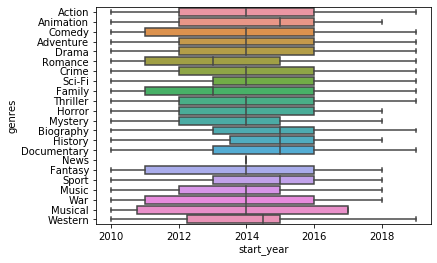

In [37]:
# Checking if there are movies made before 2010.
sns.boxplot(x='start_year', y='genres', data= df1234)

<font size='4' >Checking and analyzing the total number of genres and movies after merging and cleaning the data.</font> 

In [38]:
# Total number of genres.
df1234['genres'].nunique()

22

In [39]:
# Total number of movies- many count in few genres' categories, thus the total number is inaccurate.
df1234['original_title'].count()

6671

In [40]:
# Total number of movies without repetition.
df1234['original_title'].nunique()

1758

In [41]:
# Comparing number of movies per ganre.
df1234['genres'].value_counts()

Drama          1548
Comedy          751
Action          641
Thriller        561
Adventure       471
Horror          402
Crime           399
Romance         295
Biography       233
Mystery         230
Sci-Fi          213
Fantasy         180
Documentary     170
Animation       148
Family          136
History          75
Sport            74
Music            73
War              27
Musical          24
Western          18
News              2
Name: genres, dtype: int64

<font size='4' >Creating a bar plot to show the movies' count per genre.</font> 

In [42]:
def colors():
    my_colors = []
    for x in range(22):
        if x <= 18:
            my_colors.append('c')
        else:
            my_colors.append('b') 
    return my_colors
    
colors()

['c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'b',
 'b',
 'b']

Text(0, 0.5, 'Genres')

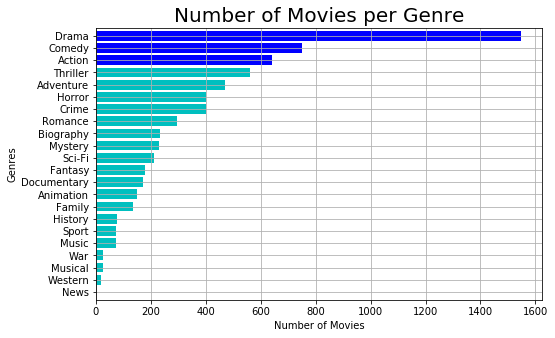

In [43]:
fig1 = df1234['genres'].value_counts().sort_values(ascending=True).plot(kind='barh',
        grid = True, figsize=(8,5), width=0.8, color = colors())
fig1.set_title('Number of Movies per Genre', fontsize=20)
fig1.set_xlabel('Number of Movies', fontsize=10)
fig1.set_ylabel('Genres',fontsize=10)

<font size='3' >  **SUMMARY** </font> 

<font size='4' >  The bar plot shows from total of 22 genres, the top 3 most commonly produced after year 2010 are *Drama*, *Comedy*, and *Action*, where *Drama* movies are almost as double the number as the other two top genres (not considering the movie repetition).</font> 

<font size='4' >**2. Which genres have the highest average rating and average popularity, and what is their correlation with the top 3 movie genres produced?**</font> 

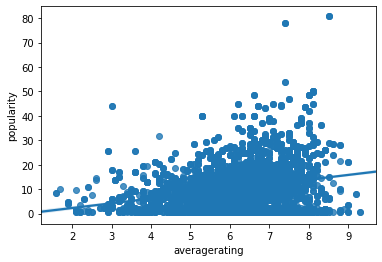

In [44]:
# Using scatter plot to check and analyze the correlation between movies' average rating and popularity.
sns.regplot('averagerating', 'popularity', df1234)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Scale')

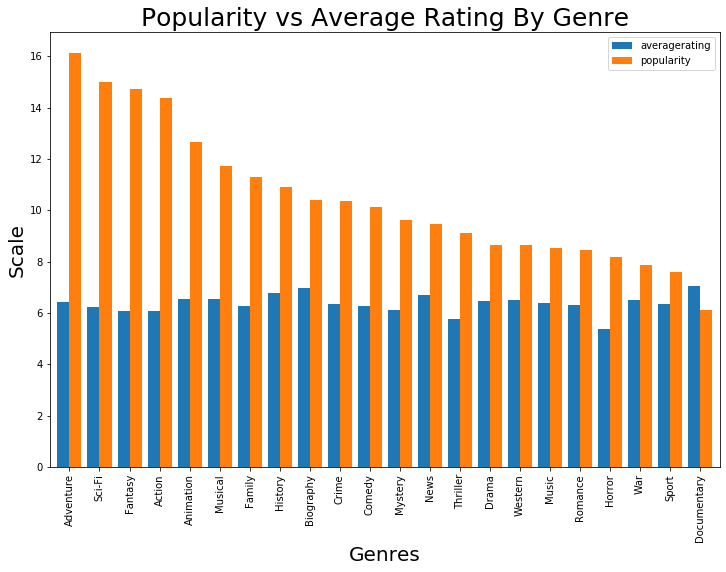

In [45]:
# Using bar plot to double check the correlation between movies' average rating and popularity using genres.
# Checking which genres have the highest average rating and average popularity.
fig2 = df1234.groupby(['genres'])['averagerating', 'popularity'].mean().sort_values(by='popularity',
      ascending=False).plot(kind='bar',figsize=(12,8), width=0.8)
fig2.set_title('Popularity vs Average Rating By Genre', fontsize=25)
fig2.set_xlabel('Genres', fontsize=20)
fig2.set_ylabel('Scale',fontsize=20)

Text(0, 0.5, 'Genres')

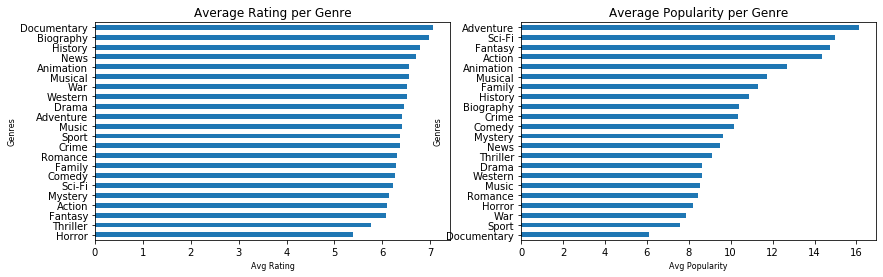

In [46]:
fig3 = plt.figure(figsize=(14,4))
ax1=plt.subplot(1,2,1)
fig3 = df1234.groupby(['genres'])['averagerating'].mean().sort_values(ascending=True).plot(kind='barh', ax=ax1)
ax1.set_title('Average Rating per Genre', fontsize=12)
ax1.set_xlabel('Avg Rating', fontsize=8)
ax1.set_ylabel('Genres', fontsize=8)
ax2=plt.subplot(1,2,2)
fig3 = df1234.groupby(['genres'])['popularity'].mean().sort_values(ascending=True).plot(kind='barh', ax=ax2)
ax2.set_title('Average Popularity per Genre', fontsize=12)
ax2.set_xlabel('Avg Popularity', fontsize=8)
ax2.set_ylabel('Genres', fontsize=8)


<font size='3' >  **SUMMARY** </font> 

<font size='4' > The average genres' rating appears to be very similar between the different genres (count number was not considered), and fig.2 shows no correlation between the average rating and popularity; however, looking at the average movies' rating vs popularity (scatter plot), there is a very slight correlation between the two. </font> 

<font size='4' > The three genres with the highest average rating are *Documentary*, *Biography*, and *History*.</font> 

<font size='4' > The three genres with the highest average popularity are *Adventure*, *Sci-Fi*, and *Fantasy*.</font> 

<font size='4' > There is no correlation between the top 3 most used genres, average rating and popularity.</font> 

<font size='4' >**3. Which genres have the highest average profits, and does production budget have an effect on the profit?**</font> 

<font size='4' >Removing '$' and ' , ' to convert the budget and gross columns into integers. </font> 

In [75]:
# The dtype was an object. Converting to str and then to int.
df1234['production_budget'] = df1234.production_budget.str.replace('$', '').str.replace(',', '').astype(str).astype(int)
df1234['production_budget'].dtype

AttributeError: Can only use .str accessor with string values!

In [55]:
# The dtype was an object. Converting to str and then to int.
df1234['domestic_gross'] = df1234.domestic_gross.str.replace('$', '').str.replace(',', '').astype(str).astype(int)
df1234['domestic_gross'].dtype

AttributeError: Can only use .str accessor with string values!

In [58]:
# The dtype was an object. Converting to str and then to int.
df1234['worldwide_gross'] = df1234.worldwide_gross.str.replace('$', '').str.replace(',', '').astype(str).astype(int)
df1234['worldwide_gross'].dtype

AttributeError: Can only use .str accessor with string values!

<font size='4' > Selecting columns to analize domestic and worldwide profits. </font> 

In [56]:
df1234_profit = df1234[['runtime_minutes', 'averagerating', 'popularity', 'movie', 'production_budget', 
                        'domestic_gross', 'worldwide_gross','genres']]
df1234_profit.head(2)

,runtime_minutes,averagerating,popularity,movie,production_budget,domestic_gross,worldwide_gross,genres
0,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Action
1,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Animation


<font size='4' > Calculating the worldwide profits (total profit). </font> 

In [57]:
# Created column dom_profit
df1234_profit['dom_profit'] = df1234_profit['domestic_gross'] - df1234_profit['production_budget']
df1234_profit.head(2)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,runtime_minutes,averagerating,popularity,movie,production_budget,domestic_gross,worldwide_gross,genres,dom_profit
0,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Action,-45000000
1,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Animation,-45000000


In [59]:
# Created column worldwide_profit
df1234_profit['worldwide_profit'] = df1234_profit['worldwide_gross'] - df1234_profit['production_budget']
df1234_profit.head(2)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,runtime_minutes,averagerating,popularity,movie,production_budget,domestic_gross,worldwide_gross,genres,dom_profit,worldwide_profit
0,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Action,-45000000,-44926294
1,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Animation,-45000000,-44926294


<font size='4' > Using scatter plot to check if there is a correlation between domestic and total profit.</font> 

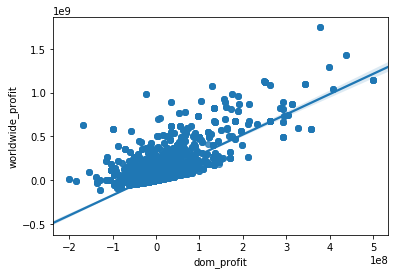

In [60]:
sns.regplot('dom_profit', 'worldwide_profit', df1234_profit)

<font size='4' >Creating a bar plot to check the genres with highest average total profit.</font> 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Genres')

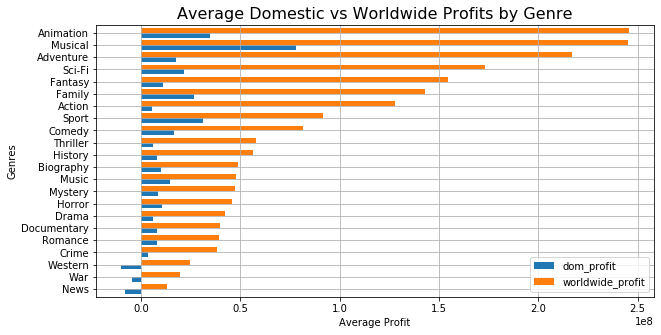

In [61]:
fig4 = df1234_profit.groupby('genres')['dom_profit', 'worldwide_profit'].mean().sort_values(by='worldwide_profit', 
       ascending=True).plot(kind='barh', grid=True, figsize=(10,5), width=0.8)
fig4.set_title('Average Domestic vs Worldwide Profits by Genre', fontsize=16)
fig4.set_xlabel('Average Profit', fontsize=10)
fig4.set_ylabel('Genres',fontsize=10)

<font size='4' > Using scatter plot to check if there is a correlation between production budget and total profit.</font> 

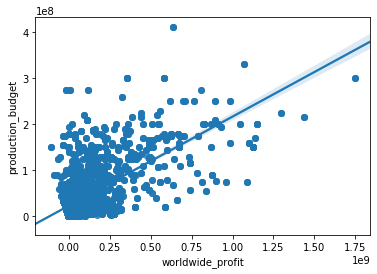

In [62]:
sns.regplot('worldwide_profit', 'production_budget', df1234_profit)

<font size='3' >  **SUMMARY** </font>  

<font size='4' > - There is positive correlation between the average domestic and worldwide profits. </font> 

<font size='4' > - The genres with the highest average domestic profit are *Musical*, *Animation*, and *Sport*. </font> 

<font size='4' >- The genres with the highest average total profit (worldwide) are *Animation*, *Musical*, and *Adventure*. </font> 

<font size='4' > - There is a strong positive correlation between production budget and profit. </font> 

<font size='4'  >  **4. How are average rating, average popularity, and the length of a movie linked to the profit of a movie (using the top 20% profit data)?**</font> 


<font size='4' > Clean repeated movies.</font> 

In [65]:
# check for duplicates
duplicates = df1234_profit[df1234_profit.duplicated()]
print(len(duplicates))

594


In [66]:
# Removing duplicates based on the movie's column.
df1234_drop_dup = df1234_profit.drop_duplicates(subset=['movie'])
df1234_drop_dup.head(2)

,runtime_minutes,averagerating,popularity,movie,production_budget,domestic_gross,worldwide_gross,genres,dom_profit,worldwide_profit
0,91.0,1.9,4.705,Foodfight!,45000000,0,73706,Action,-45000000,-44926294
3,124.0,6.1,8.919,On the Road,25000000,720828,9313302,Adventure,-24279172,-15686698


In [217]:
df1234_profit.shape

(6671, 10)

In [151]:
df1234_drop_dup.shape


(1750, 10)

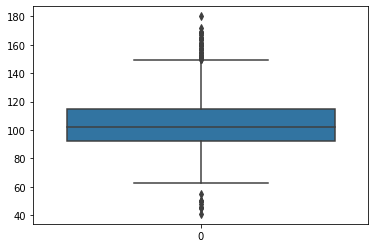

In [69]:
# Checking for outliers in the runtime_minutes' column.
sns.boxplot(data = df1234_drop_dup['runtime_minutes'])

<font size='4' > Selecting the highest 20% from the total profit (worldwide).</font> 

In [70]:
top_20 = df1234_drop_dup['worldwide_profit'].quantile(.8)

In [71]:
# Selecting the columns needed with the top 20% total profit.
df1234_top_20 = df1234_drop_dup.loc[(df1234_drop_dup['worldwide_profit'] > top_20), ['movie',
                     'averagerating', 'popularity', 'runtime_minutes', 'worldwide_profit']]
df1234_top_20

,movie,averagerating,popularity,runtime_minutes,worldwide_profit
14,Jurassic World,7.0,20.709,124.0,1433854864
24,Tangled,7.8,21.511,100.0,326477240
39,Real Steel,7.1,14.811,127.0,153880341
45,Toy Story 3,8.3,24.445,103.0,868879522
49,Lincoln,7.4,12.693,150.0,208346281
...,...,...,...,...,...
6570,The Post,7.2,15.551,116.0,129748880
6586,Creed II,7.2,26.907,130.0,163591522
6588,A Quiet Place,6.6,29.154,80.0,317522294
6625,Green Book,8.3,36.284,130.0,299034439


<font size='4' > Using scatter plots to check the correlation between average rating, popularity, and the length of a movie with the total profit for the highest 20% profit.</font> 

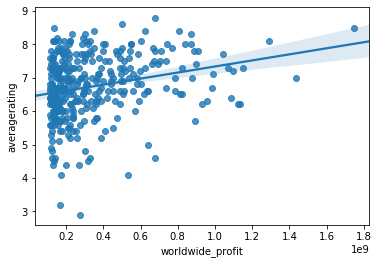

In [72]:
# Correlation between total profit and average rating.
sns.regplot('worldwide_profit', 'averagerating', df1234_top_20)

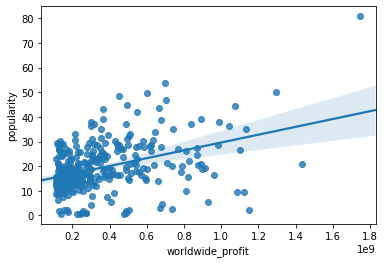

In [73]:
# Correlation between total profit and popularity.
sns.regplot('worldwide_profit', 'popularity', df1234_top_20)

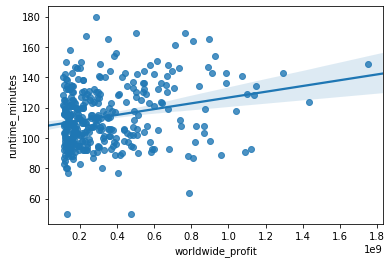

In [74]:
# # Correlation between total profit and length of a movie.
sns.regplot('worldwide_profit', 'runtime_minutes', df1234_top_20)

<font size='3' >  **SUMMARY** </font> 

<font size='4' > - There is a very slight positive correlation between the average rating, popularity, and the length of a movie with the total profit. </font> 